# RSA Demonstration

Import my RSA package into the environment

In [1]:
from RSA import *

### Key Generation
Declare the bit size we want to use

In [2]:
bitSize = 50

Generate a set of RSA keys with appropriate bitsize

In [3]:
RSA_keys = generate_RSA.KeyGen(bitSize, True)     # initalise object True sets verbose flag on KeyGen
RSA_keys.generateKeys()                           # runs generator

Prime of  25 bits found: 29953163
Checked 10 candidates in 0.00 s
Prime of  25 bits found: 31021663
Checked 3 candidates in 0.00 s

p: 29953163
q: 31021663

n: 929196928370069
e: 266976143215001
n bit length: 50
Private-Key, d: 878712427708085
Public-Key: (929196928370069, 266976143215001)
Private-Key: 878712427708085
n is 50 bits



True

### Brute Force Algorithm

In [4]:
bf = brute_force.BFSolver(RSA_keys.n, RSA_keys.e, True)   # pass it public keys, and True verbose flag
bf.solve()                                                # run solver

p: 29953163
q: 31021663
Private-Key, d: 878712427708085
Numbers checked: 264785
Time taken: 0.145 s


True

### Fermat's Factorisation Method

In [5]:
ff = fermats.FFSolver(RSA_keys.n, RSA_keys.e, True)        # pass it public keys, and True verbose flag
ff.solve()                                                 # run solver

p: 29953163
q: 31021663
Private-Key, d: 878712427708085
Numbers checked: 4682
Time taken: 0.010 s


True

### Pollard's Rho Algorithm

In [6]:
rho = pollard_rho.RhoSolver(RSA_keys.n, RSA_keys.e, True)   # pass it public keys, and True verbose flag
rho.solve()                                                 # run solver

p: 31021663
q: 29953163
Private-Key, d: 878712427708085
Numbers checked: 5384
Time taken: 0.060 s


True

### Basic Analysis
Running the above algorithms on a variety of random inputs to create graphs showing general trends.

The below style code makes the format of the graphs nicer

In [7]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

Runs each algorithm in a thread and plots the results.

- Blue = Brute Force
- Orange = Fermat's Factoring Method
- Green = Pollard's Rho

<IPython.core.display.Javascript object>


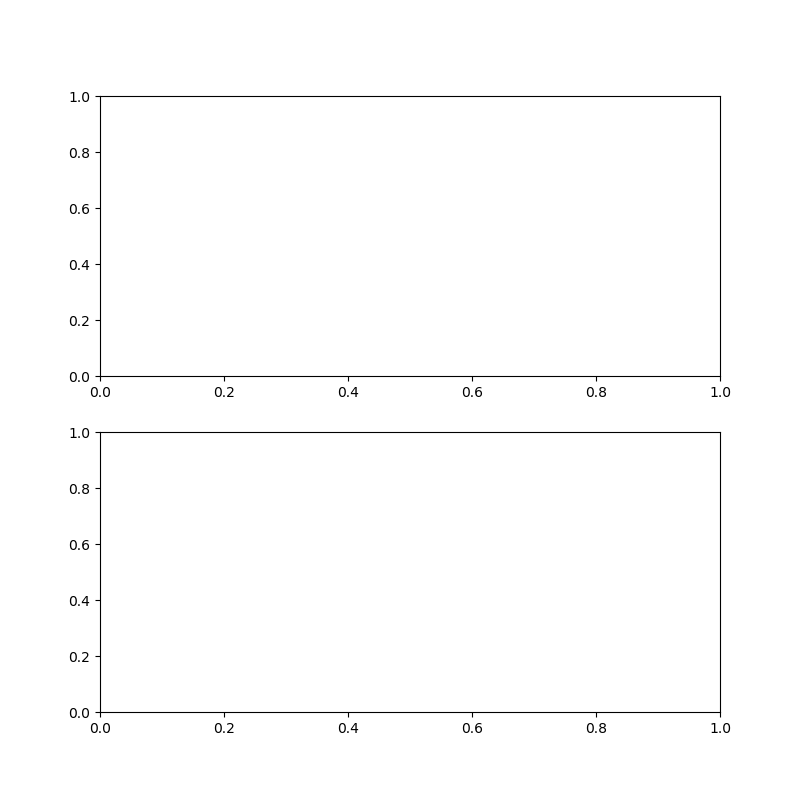

Press Enter to stop.


NameError: name 'math' is not defined

In [8]:
%matplotlib notebook
from graphs_RSA import *

minBit = 10
bf_bit = 25
ff_bit = 30
rho_bit = 30

testGraphs(minBit, bf_bit, ff_bit, rho_bit)